Throw a blanket on the dome. It should cover the figure. Energy minimisation.

In [205]:
import skimage as sk
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from copy import copy
import napari

In [45]:
image_denoise = sk.io.imread('./domes/domes_n2v/70_denoised.tif')
image = sk.io.imread('./domes/Nice Domes/70.tif')

In [3]:
viewer = napari.Viewer()
viewer.add_image(image_denoise)

<Image layer 'image_denoise' at 0x27bc249bcd0>

In [199]:
def clean_image(im):
    non_zero_cols = np.any(im != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
    return (clean_image, first_non_zero_col, last_non_zero_col)
    
def compute_mean_no_zeros(im):
    '''
    Compute the mean pixel intensity of the image.
    '''
    return np.mean(clean_image(im))

def clean_strip(im, im_d, delta=30):
    c_im, first, last = clean_image(im)
    # print('-'*30)
    # print(c_im.shape, first, last, im_d.shape)
    if (first != 0):
        first_array = np.zeros((im.shape[0], first+delta)) # Create a 2D array full of 0s dimensions of the image and the columns null + 0
        # print(im_d.shape, im_d[:, first+delta:].shape, first_array.shape)
        im_d = np.hstack((first_array, im_d[:, first+delta:]))
    if (first != im.shape[1]):
        last_array = np.zeros((im.shape[0], im.shape[1]-last+delta)) # Create a 2D array full of 0s dimensions of the image and the columns null + 0
        # print(im_d.shape, im_d[:, :last-delta + 1].shape, last_array.shape)
        im_d = np.hstack((im_d[:, :last-delta + 1],last_array))
    # print(im_d.shape)

    return im_d

def clean_strip_stack(im, im_d):
    cleaned = []
    for i, i_d in zip(im, im_d):
        cleaned.append(clean_strip(i, i_d))

    cleaned = np.array(cleaned)        
    return cleaned
    

In [201]:
# Select the timeframe to work with and remove the first and last strip by removing this part of the image

im_d = image_denoise[3]
im = image[3]
im_2 = clean_strip(im[470], im_d[470])

im_unstrip = clean_strip_stack(im, im_d)


viewer.add_image(im_unstrip)




# plt.imshow(clean_image(image[3][100]))


<Image layer 'im_unstrip' at 0x27fe0a1a310>

In [8]:
gaussian = gaussian_filter(im, sigma=2)
viewer.add_image(gaussian)

Text(0.5, 1.0, 'Intensity across Z')

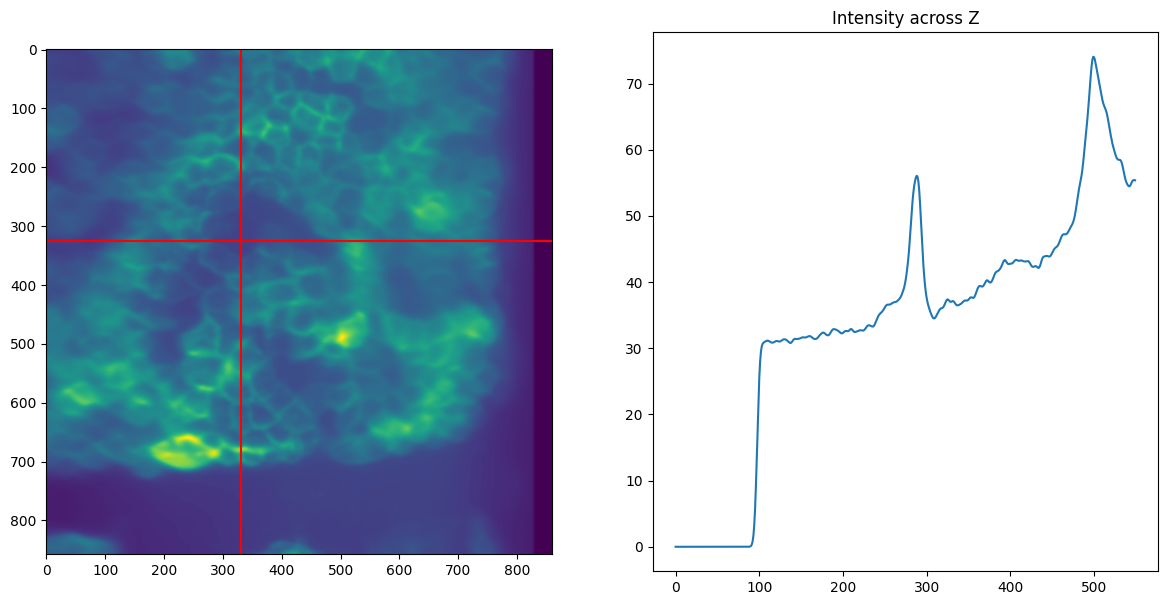

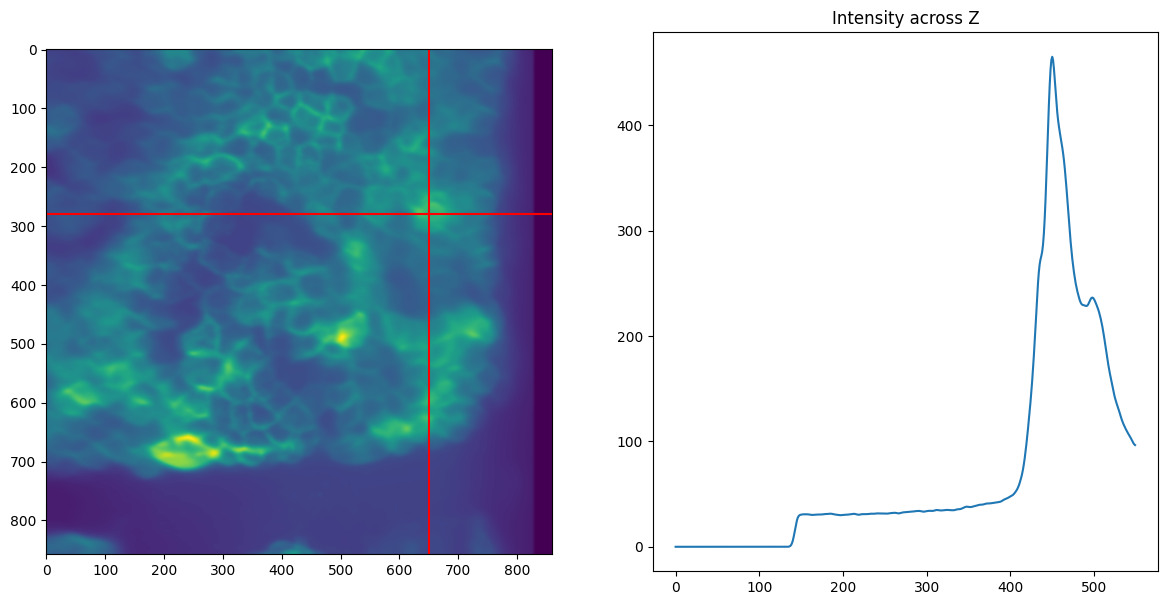

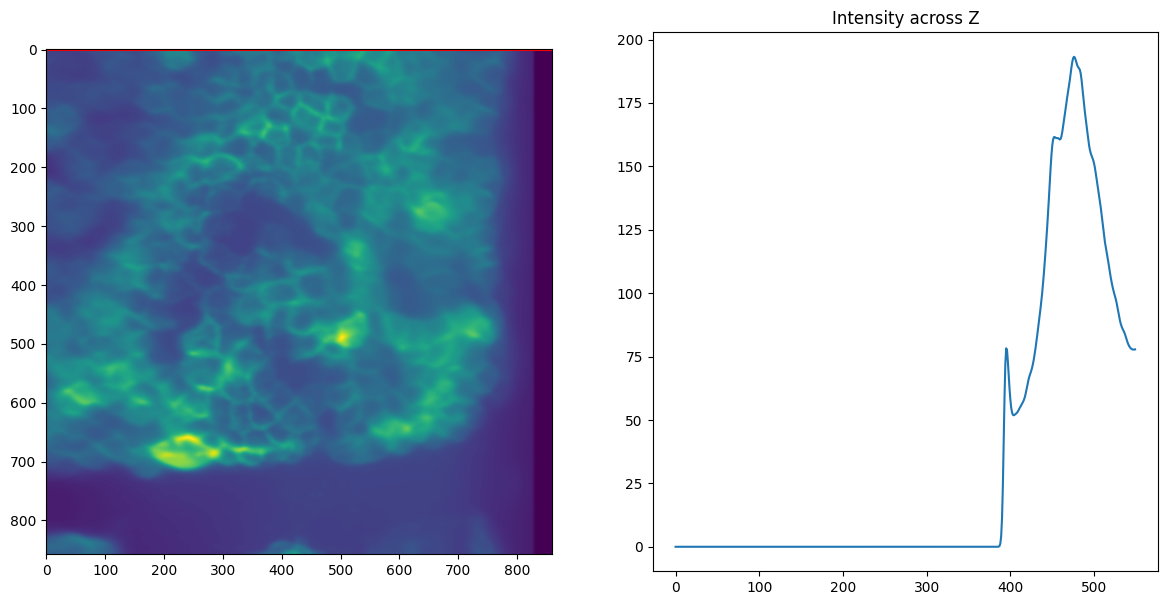

In [229]:
gaussian = gaussian_filter(im_unstrip, sigma=2)

plt.figure(figsize=(30,7))
plt.subplot(1,4,1)

# col_sum = np.sum(gaussian, axis=0)
plt.imshow(col_sum)
h = 325
v = 330
plt.axhline(h, color='r')
plt.axvline(v, color='r')

plt.subplot(1,4,2)
plt.plot(gaussian[:, v, h])
plt.title('Intensity across Z')


plt.figure(figsize=(30,7))
plt.subplot(1,4,1)

# col_sum = np.sum(gaussian, axis=0)
plt.imshow(col_sum)
h = 280
v = 650
plt.axhline(h, color='r')
plt.axvline(v, color='r')

plt.subplot(1,4,2)
plt.plot(gaussian[:, v, h])
plt.title('Intensity across Z')

###
plt.figure(figsize=(30,7))
plt.subplot(1,4,1)

plt.imshow(col_sum)
h = 0
v = 0
plt.axhline(h, color='r')
plt.axvline(v, color='r')

plt.subplot(1,4,2)
plt.plot(gaussian[:, v, h])
plt.title('Intensity across Z')

In [227]:
peaks_l = []
for v in range(gaussian.shape[1]):
    for h in range(gaussian.shape[2]):
        peaks = find_peaks(gaussian[:, v, h])
        if len(peaks[0]) > 0:
            peaks_l.append(peaks[0][0])
        else: 
            peaks_l.append(0)
        
        print(peaks)
        
        break
        
        
peaks = np.array(peaks_l)
peaks = np.reshape(peaks, (gaussian.shape[1], gaussian.shape[2]))

(array([395, 453, 456, 476], dtype=int64), {})
(array([395, 453, 456, 476], dtype=int64), {})
(array([395, 453, 456, 476], dtype=int64), {})
(array([395, 457, 477], dtype=int64), {})
(array([395, 457, 477], dtype=int64), {})
(array([395, 478], dtype=int64), {})
(array([395, 478], dtype=int64), {})
(array([395, 478], dtype=int64), {})
(array([395, 478], dtype=int64), {})
(array([395, 477], dtype=int64), {})
(array([395, 477], dtype=int64), {})
(array([395, 476], dtype=int64), {})
(array([395, 476], dtype=int64), {})
(array([395, 475], dtype=int64), {})
(array([395, 472], dtype=int64), {})
(array([395, 470], dtype=int64), {})
(array([395, 469], dtype=int64), {})
(array([395, 468], dtype=int64), {})
(array([395, 468], dtype=int64), {})
(array([395, 467], dtype=int64), {})
(array([395, 467], dtype=int64), {})
(array([395, 466, 489], dtype=int64), {})
(array([395, 466, 490], dtype=int64), {})
(array([395, 465, 480, 491], dtype=int64), {})
(array([395, 465, 480, 491], dtype=int64), {})
(arra

ValueError: cannot reshape array of size 858 into shape (858,859)

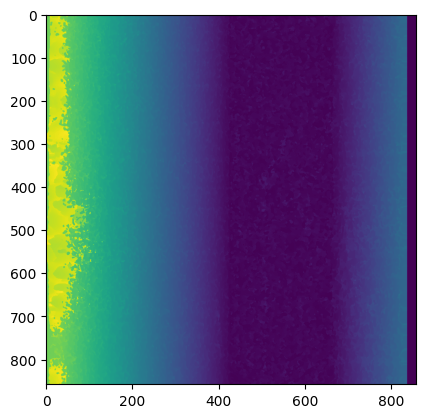

In [225]:
plt.imshow(peaks)


Make a first mask approach, then get the top and calculate a surface among distant points to compute the normal and find a distance value that has the greater pixel intensity.